# Big Data (UNT) -  2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 19 de septiembre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- en el canal de Slack #TP-entregas
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [8]:
# Resolver acá
import requests
import pandas as pd

In [10]:
buscar = "remeras seleccion argentina 2024"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"remeras seleccion argentina 2024","paging":{"total":134,"primary_results":34,"offset":0,"limit":50},"results":[{"id":"MLA1889245008","title":"Camiseta Seleccion Argentina Mundial 2022 Gold Algodon","condition":"new","thumbnail_id":"759049-MLA78591769461_082024","catalog_product_id":null,"listing_type_id":"gold_special","sanitized_title":"camiseta-seleccion-argentina-mundial-2022-gold-algodon","permalink":"https://articulo.mercadolibre.com.ar/MLA-1889245008-camiseta-seleccion-argentina-mundial-2022-gold-algodon-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1286","domain_id":"MLA-FOOTBALL_SHIRTS","variation_id":"181444066164","thumbnail":"http://http2.mlstatic.com/D_759049-MLA78591769461_082024-O.jpg","currency_id":"ARS","order_backend":1,"price":36990,"original_price":null,"sale_price":{"price_id":"","amount":36990,"conditions":{"eligible":true,"context_restrictions":[],"start_time":null,"end_time":nu

In [11]:
url

'https://api.mercadolibre.com/sites/MLA/search?q=remeras%20seleccion%20argentina%202024'

In [12]:
# Pero podríamos guardar el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'remeras seleccion argentina 2024',
 'paging': {'total': 134, 'primary_results': 34, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1889245008',
   'title': 'Camiseta Seleccion Argentina Mundial 2022 Gold Algodon',
   'condition': 'new',
   'thumbnail_id': '759049-MLA78591769461_082024',
   'catalog_product_id': None,
   'listing_type_id': 'gold_special',
   'sanitized_title': 'camiseta-seleccion-argentina-mundial-2022-gold-algodon',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1889245008-camiseta-seleccion-argentina-mundial-2022-gold-algodon-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1286',
   'domain_id': 'MLA-FOOTBALL_SHIRTS',
   'variation_id': '181444066164',
   'thumbnail': 'http://http2.mlstatic.com/D_759049-MLA78591769461_082024-O.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 36990,
   'original_price': None,
   'sale_price': {'price

#### Ejercicio 2
#Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [17]:
# Resolver acá
precios = [item['price'] for item in data['results']]
df_precios = pd.DataFrame(precios, columns=['precio'])

# Calcular estadísticas descriptivas
print(df_precios.describe())

              precio
count      50.000000
mean    31186.183800
std     24373.160092
min      3229.050000
25%     18000.000000
50%     22499.000000
75%     31535.375000
max    123990.000000


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

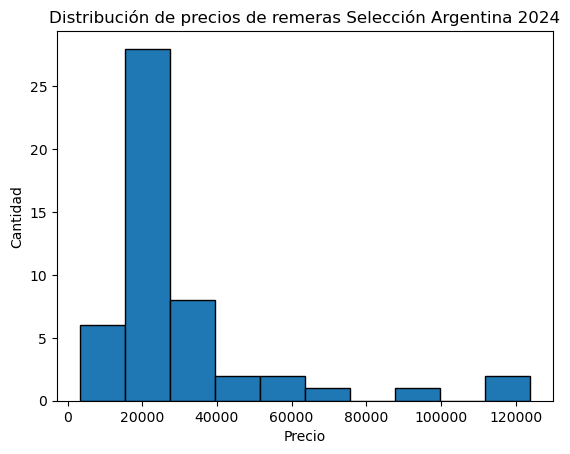

In [21]:
# Resolver acá

plt.hist(df_precios['precio'], bins=10, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('Distribución de precios de remeras Selección Argentina 2024')
plt.show()

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [25]:
# Obtener la ID de la categoría: Primero, obtenemos la ID de la categoría "Celulares y teléfonos" para poder usarla en la búsqueda.
# URL de la categoría (ajustar según la categoría deseada)
categoria_url = "https://api.mercadolibre.com/sites/MLA/categories/MLA1051"

# Realizar solicitud para obtener la ID de la categoría
response = requests.get(categoria_url)
data = response.json()
categoria_id = data['id']


KeyError: 'id'

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [29]:
# Instalamos el beautiful soup y luego los pandas
!pip install requests 
!pip install BeautifulSoup 
!pip install pandas
# Nota: si no tienen instaladas las librarías a importar debajo, primero deben instalarlas 
# (para eso, quiten el # y activen las 3 líneas de código de arriba)

import requests #html requestor
#from bs4 import BeautifulSoup #html parser
#import pandas as pd #dataframe manipulator

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\jose.lopez\AppData\Local\Temp\pip-install-s6av8ayh\beautifulsoup_330cf3d9a8614297b31763a3a0709f0e\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above,

In [31]:
url = "https://www.lanacion.com.ar/"

r = requests.get(url) #traigo el contenido del html
contenido = r.content

soup = BeautifulSoup(contenido, "html.parser")
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/el-presidente-javier-milei-presento-el-6USJTZE4CNCDXM7NSZXB7EC64U.JPG?auth=6ce9f1d51886ee71c7b9507af9eba8e5d7dddf0f259a46f48aeecbf896e51189&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/el-presidente-javier-milei-presento-el-6USJTZE4CNCDXM7NSZXB7EC64U.JPG?auth=6ce9f1d51886ee71c7b9507af9eba8e5d7dddf0f259a46f48aeecbf896e51189&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><style id="critical-fonts">
@font-face {font-family:'P